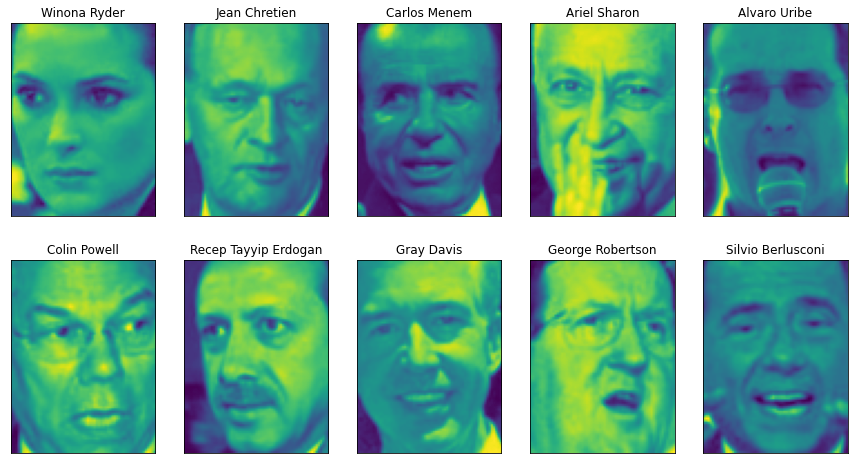

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fig, axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [3]:
print("People, images, shape: ", format(people.images.shape))
print("Number of classes: ", format(len(people.target_names)))

People, images, shape:  (3023, 87, 65)
Number of classes:  62


In [4]:
import numpy as np
#count how ofter each target appears
counts = np.bincount(people.target)
#print name next to each target name
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end= ' ')
    if(i+1)%3 ==0:
        print()
    


Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [5]:
# to make data less skewed, will take up to 50 images of each person
mask = np.zeros(people.target.shape, dtype= bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] =1
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale value to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people /255

In [6]:
#using kneighboursclassifier to train the data to scan each training example per class
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test score", format(knn.score(X_test, y_test)))

Test score 0.23449612403100775


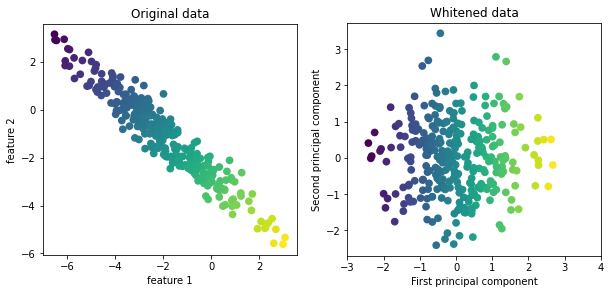

In [7]:
import mglearn 
mglearn.plots.plot_pca_whitening()


In [8]:
from sklearn.decomposition import PCA
pca= PCA (n_components=100, whiten = True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_PCA", format(X_train_pca.shape))

X_train_PCA (1547, 100)


In [9]:
'''The new data has 100 features, the first 100 principal components. Now, we can use the new representation to classify our 
images using a one nearest neighbour classifier'''
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train_pca, y_train)
print("Test set accuracy: ", format(knn1.score(X_test_pca, y_test)))

Test set accuracy:  0.3062015503875969


In [10]:
print('pca.components_.shape', format(pca.components_.shape))

pca.components_.shape (100, 5655)


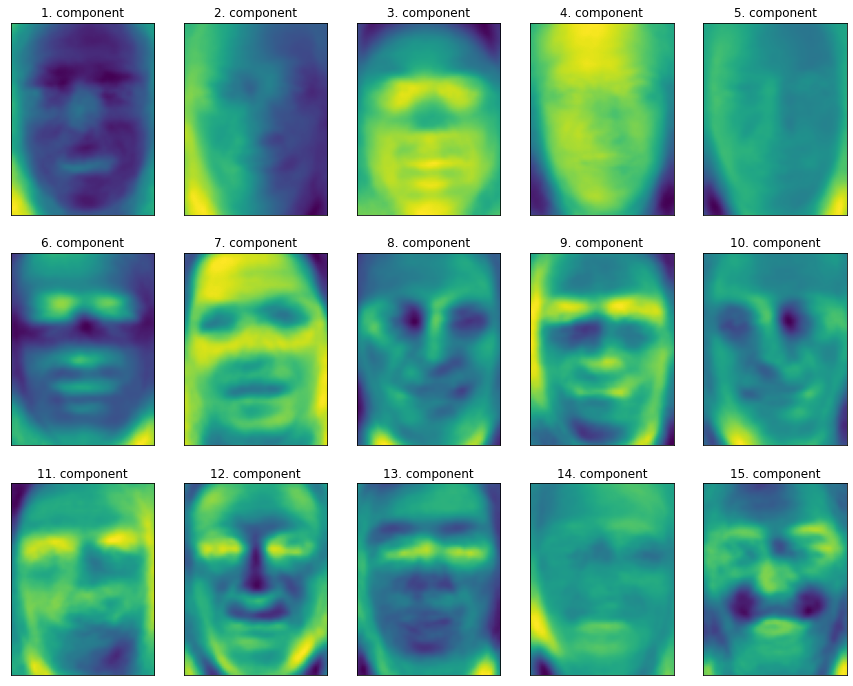

In [11]:
fix, axes = plt.subplots(3,5, figsize=(15,12),subplot_kw={'xticks': (), 'yticks': ()})
for i,(component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

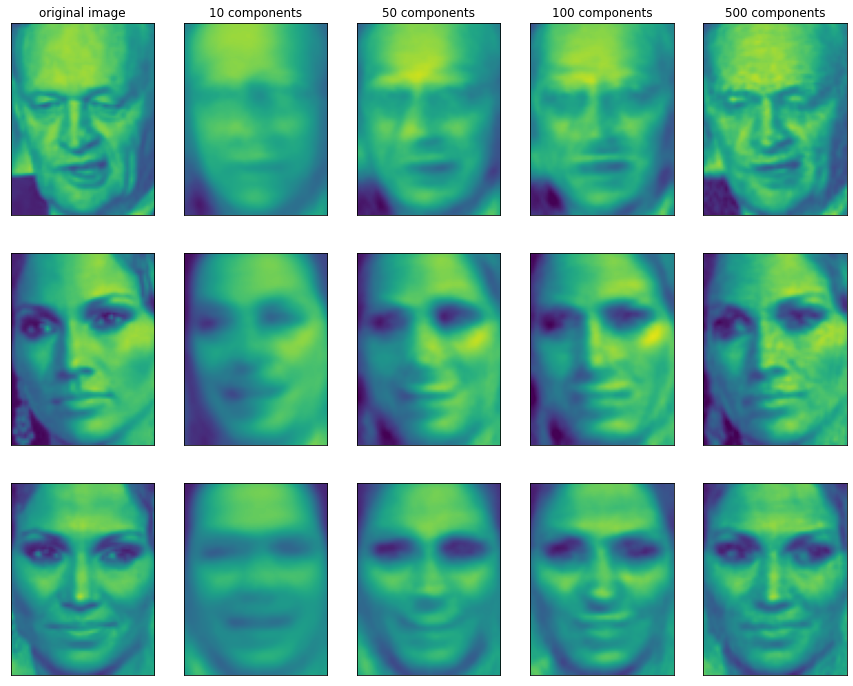

In [12]:
import mglearn
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)
#It can be observed that using the first 10 components only the essence of the picture, like face orientation and lighting is 
#captured. By using more princial components, more and more details could be preseved.


Text(0, 0.5, 'Second Principal Component')

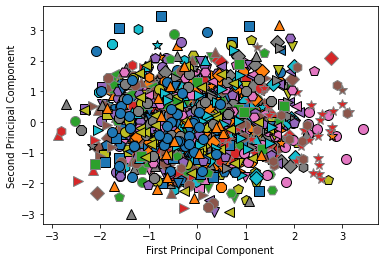

In [13]:
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:,1], y_train)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

In [ ]:
#when we use only the first two principal components the whole data is just a big blob, with no seperation of classes visible
#This shows that PCA only captures very rough characterstics of the faces.